In [2]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from neurodiffeq.monitors import Monitor1D
# %matplotlib notebook

Training Progress:   0%|                               | 0/1000 [00:00<?, ?it/s]

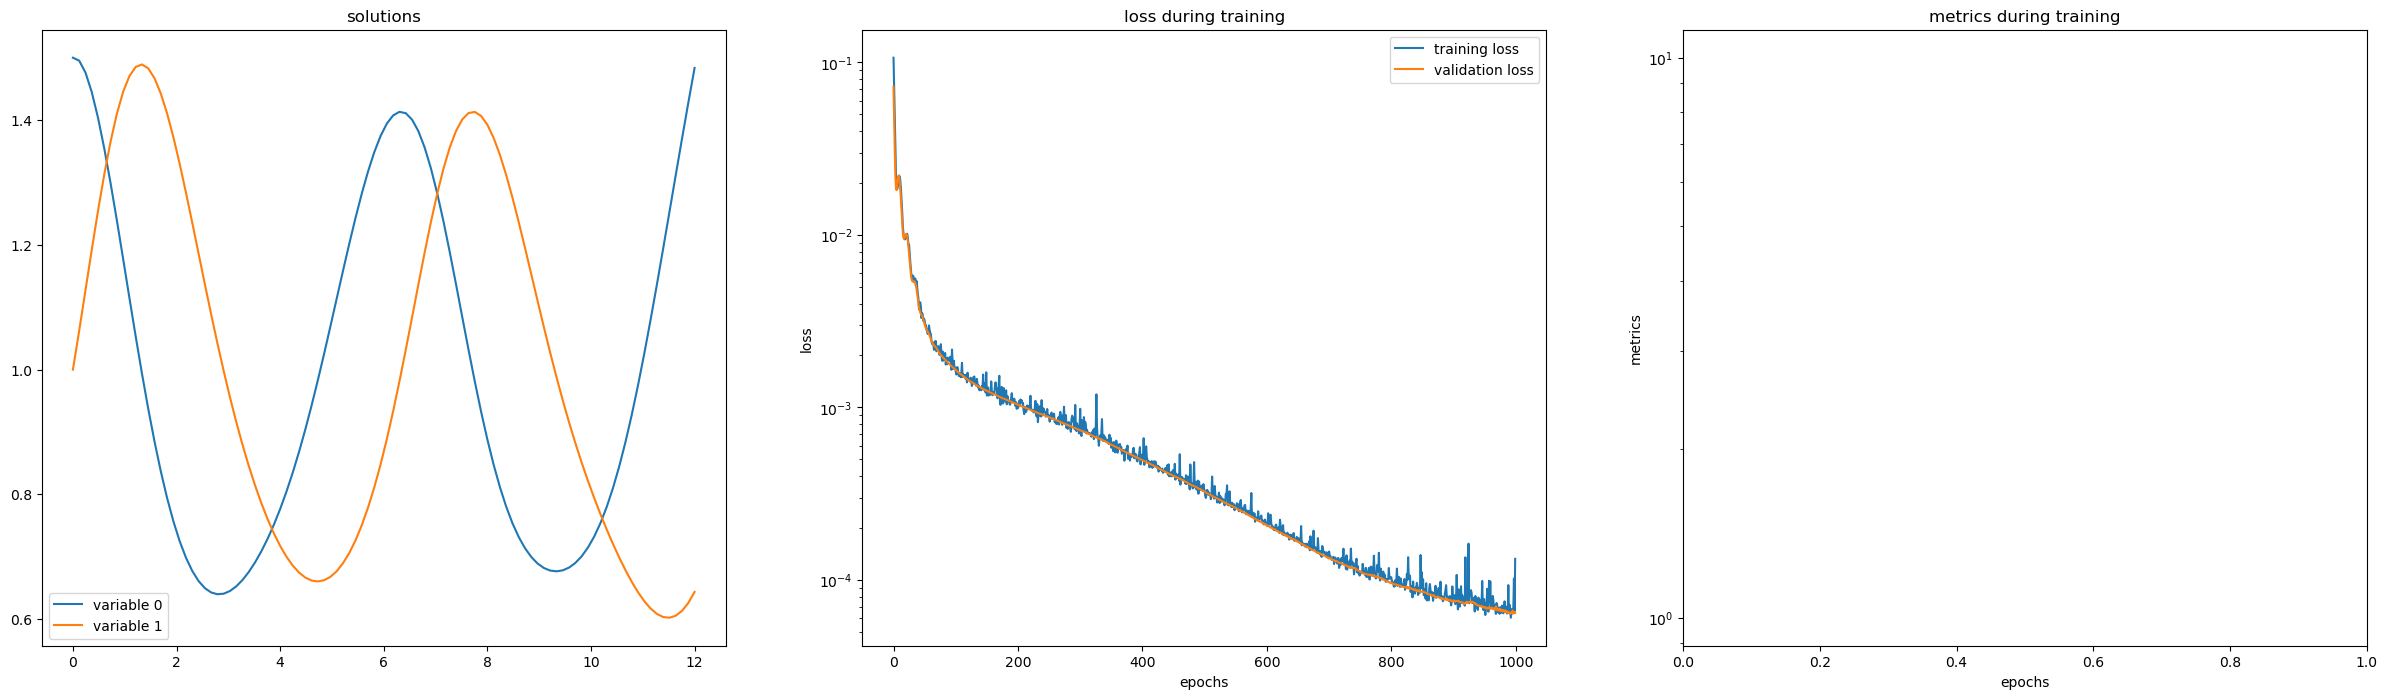

In [3]:
def ode_system(u, v, t): 
    return [diff(u,t)-(u-u*v), diff(v,t)-(u*v-v)]

conditions = [IVP(t_0=0.0, u_0=1.5), IVP(t_0=0.0, u_0=1.0)]
nets = [FCNN(actv=SinActv), FCNN(actv=SinActv)]

monitor = Monitor1D(t_min=0.0, t_max=12.0, check_every=1000)
solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=10.0, nets=nets)
solver.fit(max_epochs=1000,callbacks=[monitor.to_callback()])
solution = solver.get_solution()

In [4]:
internals = solver.get_internals()
internals

{'metrics': {},
 'n_batches': {'train': 1, 'valid': 4},
 'best_nets': [FCNN(
    (NN): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): SinActv()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): SinActv()
      (4): Linear(in_features=32, out_features=1, bias=True)
    )
  ),
  FCNN(
    (NN): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): SinActv()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): SinActv()
      (4): Linear(in_features=32, out_features=1, bias=True)
    )
  )],
 'criterion': <function neurodiffeq.solvers.BaseSolver._set_loss_fn.<locals>.<lambda>(r, f, x)>,
 'loss_fn': <function neurodiffeq.solvers.BaseSolver._set_loss_fn.<locals>.<lambda>(r, f, x)>,
 'conditions': [<neurodiffeq.conditions.IVP at 0x165d8fbd0>,
 'global_epoch': 1000,
 'lowest_loss': 6.370239101022873e-05,
 'n_funcs': 2,
 'nets': [FCNN(
    (NN): Sequential(
      (0): Linear(in_feature

In [5]:
t = np.linspace(0.1, 10.0, 10000)
u, v = solution(t, to_numpy=True)  # t can be np.ndarray or torch.Tensor

In [6]:
def func(t,x):
    y = np.zeros(len(x))
    y[0] = x[0]- x[0]*x[1]
    y[1] = x[0]*x[1] - x[1]
    return y

In [7]:
x0 = np.array([1.5,1.0])
y_out = solve_ivp(func, t_span = [0.1,10.0], y0 = x0, method='RK45', t_eval=t)

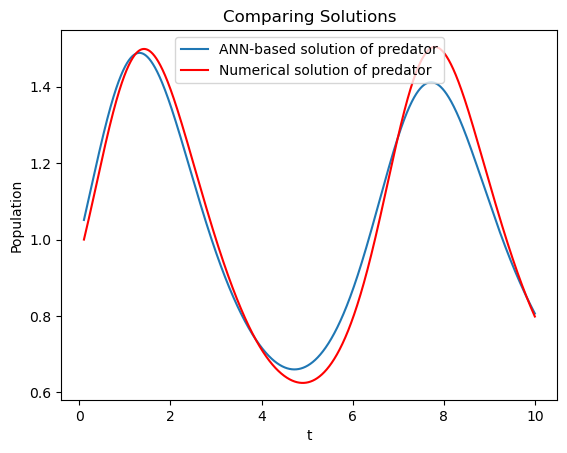

In [8]:
plt.title("Comparing Solutions")
plt.ylabel('Population')
plt.xlabel('t')
# plt.plot(t, u, label='ANN-based solution of prey')
# plt.plot(y_out.t,y_out.y[0],label='Numerical solution of prey',color = 'r')
plt.plot(t, v, label='ANN-based solution of predator')
plt.plot(y_out.t,y_out.y[1],label='Numerical solution of predator',color="r")
plt.legend()
plt.savefig('predator.png')
plt.show()

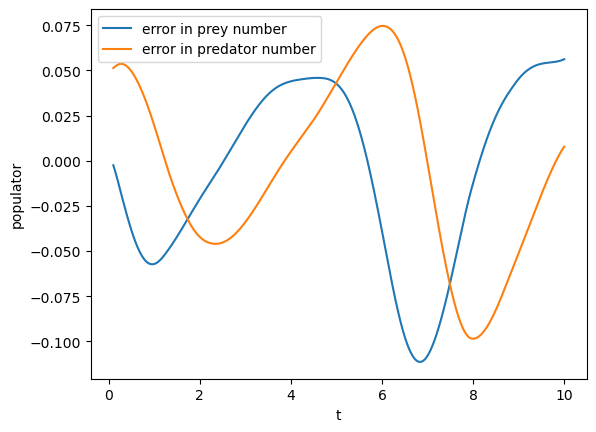

In [9]:
# plt.set_title('Error of ANN solution from numerical solution')
plt.plot(t, u-y_out.y[0], label='error in prey number')
plt.plot(t, v-y_out.y[1], label='error in predator number')
plt.ylabel('populator')
plt.xlabel('t')
plt.legend()
plt.savefig('errorlotka.png')

Training Progress:   0%|                               | 0/1000 [00:00<?, ?it/s]

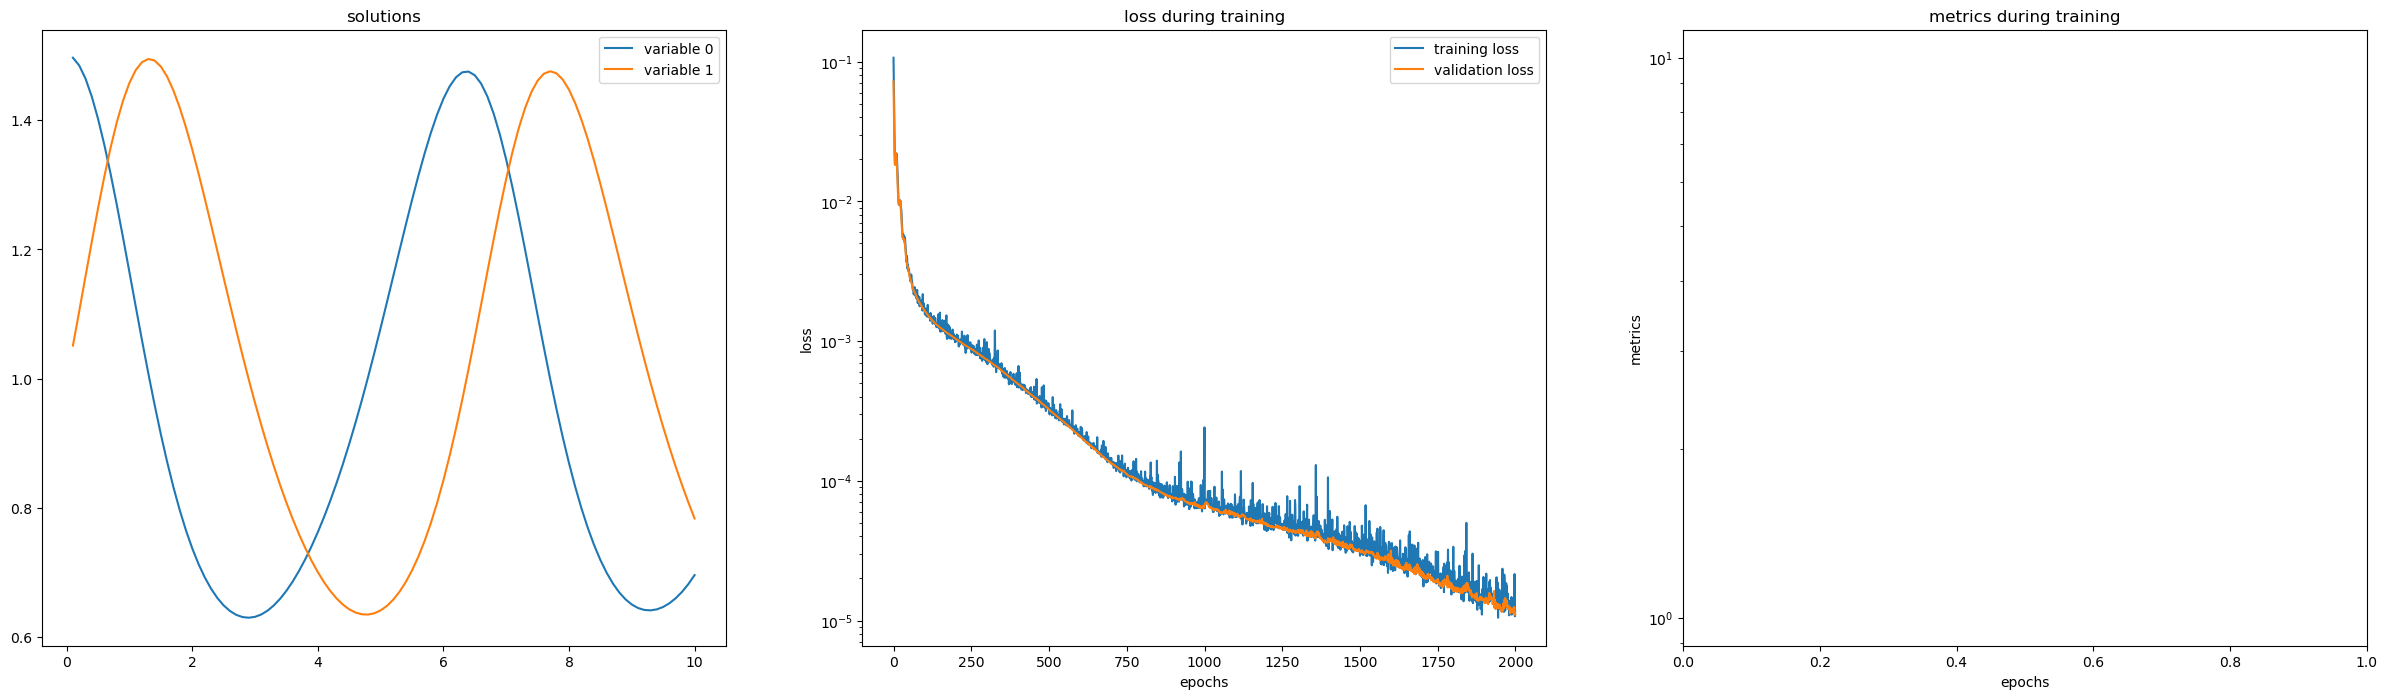

In [10]:
from neurodiffeq.monitors import Monitor1D
...
monitor = Monitor1D(t_min=0.1, t_max=10.0, check_every=1000)
solver.fit(max_epochs=1000,callbacks=[monitor.to_callback()])

In [11]:
net1 = FCNN(n_input_units=..., n_output_units=..., hidden_units=[..., ..., ...], activation=...) 
nets = [net1, net2, ...]

TypeError: FCNN.__init__() got an unexpected keyword argument 'activation'

In [ ]:
...
g1 = Generator1D(size=..., t_min=..., t_max=..., method=..., noise_std=...)
g2 = Generator1D(size=..., t_min=..., t_max=..., method=..., noise_std=...)
solver = Solver1D(..., train_generator=g1, valid_generator=g2)